# Evaluating Clustering

In [1]:
import seaborn as sns
import string
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd

We'll continue with the iris dataset because it's visually clear.

In [2]:
measurement_cols = ['sepal_length','petal_length','sepal_width','petal_width']

iris_df = sns.load_dataset('iris')
iris_X = iris_df[measurement_cols]

## Clusting with KMeans

In [3]:
km3 = KMeans(n_clusters=3)

In [4]:
km3.fit(iris_X)

KMeans(n_clusters=3)

In [5]:
km3.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

How do we tell if this is good?

One way to intuitively think about a good clustering solution is that every point should be close to points in the same cluster and far from points in other clusters. By definition with Kmeans, they will always be clos*er* to points in the same cluster, but we also what that the clusters aren't just touching, but actually spaced apart, if the clustering actually captures meaningfully different groups.

## Silhouette Score

````{margin}
```{admonition} Further Reading
See the [user guide](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) for more detail on this score including citations to source materials and advantages and disadvantages.
```
````
The [Silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) computes a ratio of how close points are to points in the same cluster vs other clusters.

$$ s = \frac{b-a}{max(a,b)}$$


a: The mean distance between a sample and all other points in the same class.


b: The mean distance between a sample and all other points in the next nearest cluster.

We can calculate this score for each point and get the average.

If the cluster is really tight, all of the points are close, then a will be small.  
If the clusters are really far apart, b will be large.
If both of these are true then b-a will be close to the value of b and the denominator will be b, so the score will be 1.

If the clusters are spread out and close together, then a and be will be close in value, and the s will be close 0. These are overlapping clusters, or possibly too may clusters for this data.



Let's check our clustering solution:

In [6]:
metrics.silhouette_score(iris_X,km3.labels_)

0.5528190123564098

In [7]:
km2 = KMeans(n_clusters=2)
km4 = KMeans(n_clusters=4)
km2.fit(iris_X)
km4.fit(iris_X)

KMeans(n_clusters=4)

In [8]:
metrics.silhouette_score(iris_X,km2.labels_)

0.6810461692117464

In [9]:
metrics.silhouette_score(iris_X,km4.labels_)

0.49805050499728815

In [10]:
iris_df['clusters3'] = km3.labels_

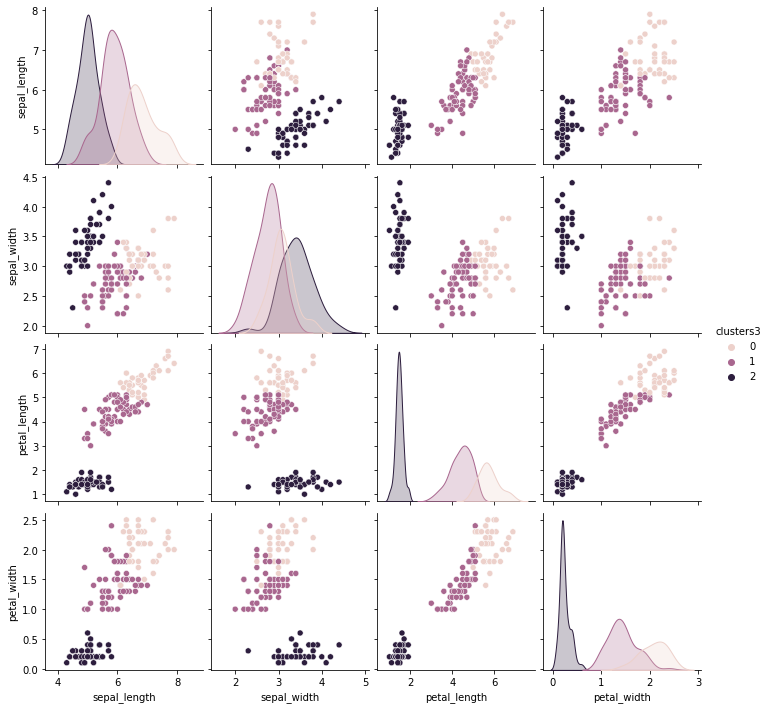

In [11]:
sns.pairplot(data= iris_df,hue= 'clusters3',)
# read docs to figure out hwy it didnt' plot clusters3

````{margin}
```{admonition} Further Reading

Other types of clustering: [sklearn overivew](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods)

[classifier comparison](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
```
````

## What's a good Silhouette Score?

To think through what a good silhouette score is, we can apply the score to data that represents different scenarios.

First, I'll re-sample some data like we used on Monday, but instead of applying K-means and checking the score of the actual algorithm, we'll add a
few different scenarios and add that score.

In [12]:
K = 4
N = 200
classes = list(string.ascii_uppercase[:K])
mu = {c: i for c, i in zip(classes,[[2,2], [6,6], [2,6],[6,2]])}


# sample random cluster assignments
target = np.random.choice(classes,N)

# sample points with different means according to those assignments
data = [np.random.multivariate_normal(mu[c],.25*np.eye(2)) for c in target]
df = pd.DataFrame(data = data,columns = ['x' + str(i) for i in range(2)])

# save the true assignments
df['true'] = target

# random assignments, right number of clusters
df['random'] = np.random.choice(classes,N)

# random assignments, way too many clusters
charsK4 = list(string.ascii_uppercase[:K*4])
df['random10'] = np.random.choice(charsK4,N)

# Kmeans with 2x number of clusters
kmrK2 = KMeans(K*2)
kmK2.fit(df[['x0','x1']])
df['km' + str(K*2)] = kmK2.labels_

# assign every point to its own cluster
df['id'] = list(range(N))

df.head()

NameError: name 'np' is not defined

In [13]:
sns.pairplot(data =df, hue='char')

NameError: name 'df' is not defined

```{admonition} Try it yourself

Compute the score for each and make plots.

```


## Mutual Information

````{margin}
```{admonition} Further Reading
Sklearn proides many [mutual information based scores](https://scikit-learn.org/stable/modules/clustering.html#mutual-information-based-scores). See the user guide for definitions of each, pros and cons and examples.
```
````
When we know the truth, we can see if the learned clusters are related to the true groups, we can't compare them like accuracy but we can use a metric that is intuitively like a correlation for categorical variables, the mutual information.

Formally mutual information uses the joint distribution between the true labels and the cluster assignments to see how much they co-occur.  If they're the exact same, then they have maximal mutual information.  If they're completely and independent, then they have 0 mutual information.
Mutual information is related to entropy in physics.

The [`mutual_info_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html#sklearn.metrics.mutual_info_score) method in the `metrics` module computes mutual information.


---

```python
metrics.mutual_info_score(iris_df['species'],km2.labels_)
```
---

```python
metrics.mutual_info_score(iris_df['species'],km3.labels_)
```

---

```python
metrics.mutual_info_score(iris_df['species'],km4.labels_)
```

There's some random chance of getting things correct, so the adjusted mutual information corrects for that.

```{admonition} Try it yourself
See how adjusted mutual information and mutual information compare on the iris data, the synthetic data above, or even use it in assignment 9.
```


<!-- ## Relationship between Tasks

We learned classification first, because it shares similarities with each
regression and clustering, while they share less.


- What do classification and regression share? How to they differ?
- What do classification and clustering share? How to they differ?
- How do these differences and similarities relate to what data we can use for
each and what types of questions we can ask? -->

## Questions After Class


### How I would use all of those different clustering algorithms
```{toggle}
One nice thing about `sklearn` is that in code, they all work basically the same way. The  [clustering overivew](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods) figure that was saw has the code for it in the [demo](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html) section of the documentation.  So you can download, run, and see all of them.

In a practical case, we choose by combining domain knowledge, exploratory data analyses (eg looking at the data) and the comparison techniques we'll see in two weeks.
```

### How exactly do I find numbers of clusters
```{toggle}
We'll look at strategies for finding the optimal number of clusters next week.
```

### what do you mean by the data is represented in the 4th dimension?
```{toggle}
the iris data has 4 *features* petal length, petal width, sepal length, sepal width. You can think of the features, or columsn of the dataset as dimensions of the data.  Each plot shows two of them, since it's a 2 dimensional plot.
```

### How do we utilize these clusters once we have them?
```{toggle}
Clustering can be used to find subroups in a dataset.  For example one of my lab mate in grad school was collaborating with doctors to determine if COPD was actually many diseases with similar symptoms by clustering patients. With the results of the clusters, doctors could use those as hypothses to look for underlying mechanisms of the disease or, they could use the cluster parameters to define classifier.  This classifier would allow them to predict how one patient's disease woudl progress over time based on other patients that were similar to them.

We can also use clustering to just see if there are groups that are actually different or not.  For example, we could use the NBA player stats data to see if there are different types of players, statistically.  We know that players have a "position" that they play, but they may or may not be discretely different statistically, it could be sort of a smooth variation across all players. They could also have more "types" of players than there are positions.


```



### How do we interpret the cluster labels?

```{toggle}
We can't know for sure what clusters represent exactly.  We can interpret them based on what we know about the features, or if we have labels we can use those.  We can use visual inspection to figure it out. 
```

### How does Kmeans work in the simplest terms?
```{toggle}
K means splits the data into K groups based on what points are close together (or most similar).  If K = 3, then it will find 3 groups that are most similar.
```

```{important}
if you don't see your question and the above don't answer it, then I misunderstood your question (the last two are my significant rephrasing of questions I had trouble with). If that's the case, **please** reach out to help me understand what you're confused about.
```